In [118]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import statistics as stat

In [142]:
#read csv file
df = pd.read_csv("./ds_salaries.csv")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [120]:
#Find duplicate rows
duplicate_rows = df[df.duplicated()]
#Remove duplicate rows
df = df.drop_duplicates()
df


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [139]:
# finding if there are any null value
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [135]:
salary_df= df["salary"]
salary_df.describe()

count    3.755000e+03
mean     1.906956e+05
std      6.716765e+05
min      6.000000e+03
25%      1.000000e+05
50%      1.380000e+05
75%      1.800000e+05
max      3.040000e+07
Name: salary, dtype: float64

In [136]:
# describing salary in usd
salary_usd_df= df["salary_in_usd"]
salary_usd_df.describe()

count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

In [127]:
new_df = df[["job_title", "salary_in_usd"]]
new_df

,job_title,salary_in_usd
0,Principal Data Scientist,85847
1,ML Engineer,30000
2,ML Engineer,25500
3,Data Scientist,175000
4,Data Scientist,120000
...,...,...
3750,Data Scientist,412000
3751,Principal Data Scientist,151000
3752,Data Scientist,105000
3753,Business Data Analyst,100000


In [128]:
#calculating averge salary in usd
mean_salary_usd = round(new_df["salary_in_usd"].mean(), 2)
mean_salary_usd


133409.28

In [129]:

data= df[["work_year","employment_type","job_title","salary_in_usd","employee_residence"]]
data_df = pd.DataFrame(data)
data_df

,work_year,employment_type,job_title,salary_in_usd,employee_residence
0,2023,FT,Principal Data Scientist,85847,ES
1,2023,CT,ML Engineer,30000,US
2,2023,CT,ML Engineer,25500,US
3,2023,FT,Data Scientist,175000,CA
4,2023,FT,Data Scientist,120000,CA
...,...,...,...,...,...
3750,2020,FT,Data Scientist,412000,US
3751,2021,FT,Principal Data Scientist,151000,US
3752,2020,FT,Data Scientist,105000,US
3753,2020,CT,Business Data Analyst,100000,US


In [130]:
#calculating averge salary by country
average_salary_by_country = df.groupby("employee_residence")["salary_in_usd"].mean().reset_index()
average_salary_by_country = average_salary_by_country.rename(columns={"salary_in_usd": "Average_Salary_in_USD"})
average_salary_by_country= round(average_salary_by_country,2)
average_salary_by_country

,employee_residence,Average_Salary_in_USD
0,AE,100000.00
1,AM,50000.00
2,AR,35500.00
3,AS,32777.50
4,AT,71125.83
...,...,...
73,TR,19058.00
74,UA,57850.00
75,US,153972.21
76,UZ,103000.00


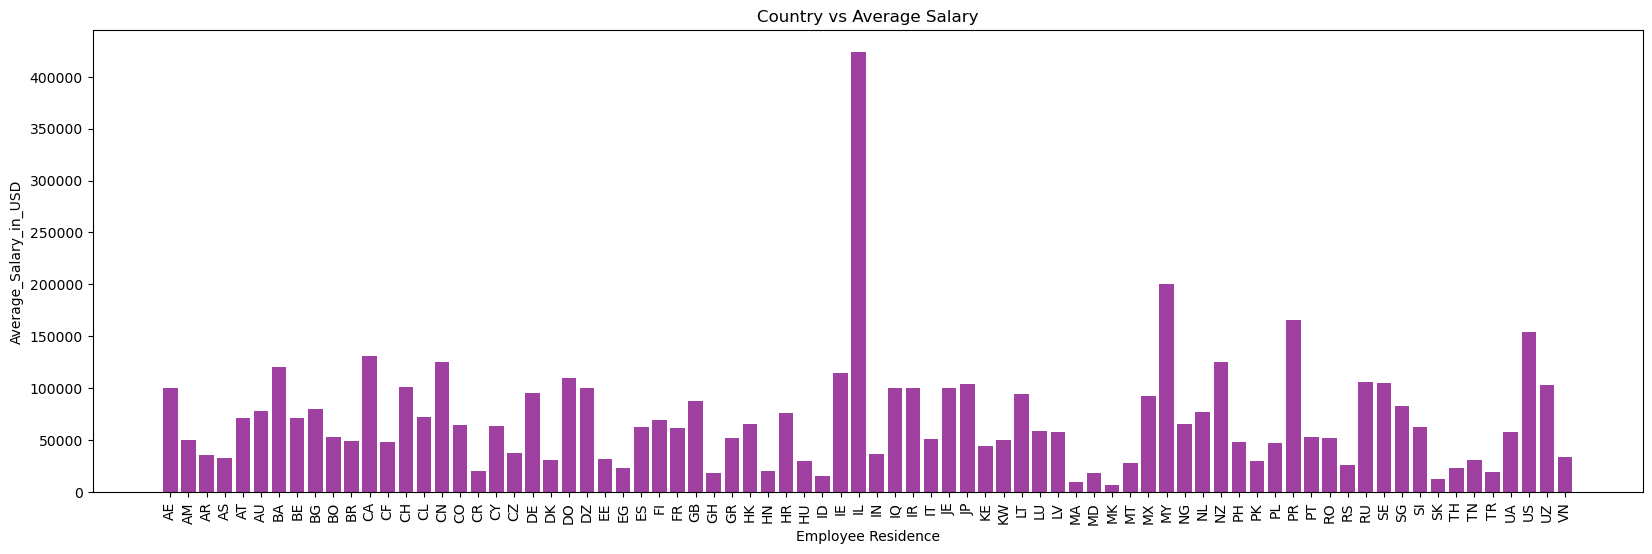

In [131]:
#plot bar chart Country vs Average Salary
fig = plt.figure(figsize = (20,6))
plt.bar(average_salary_by_country["employee_residence"], average_salary_by_country["Average_Salary_in_USD"],color ='purple',alpha=0.75)
plt.xlabel("Employee Residence")
plt.ylabel("Average_Salary_in_USD")
plt.title("Country vs Average Salary")
plt.xticks(rotation=90)
plt.show()

In [132]:
#highest_salary= average_salary_by_country.max()
highest_salary

employee_residence             VN
Average_Salary_in_USD    423834.0
dtype: object